## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Final Project Submission - Phase 1 Project

# Student Name: KIM, Jae Heon
# Student Pace: Full Time, NYC
# Schedule Project Review Date/Time:
# Instructor Name: Brendan Hutchinson
# Blog post URL:

In [2]:
# Import all the statistical packages necessary for this project.

import pandas as pd
import numpy as np
import sqlite3

# Import all the data visualization packages necessary for this project.

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
# Turn all CSV and TSV files into Pandas Dataframe to develope further studies.

bom_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [4]:
!ls zippedData

bom.movie_gross.csv.gz  im.db2                  rt.reviews.tsv.gz
im.db                   im.db3                  tmdb.movies.csv.gz
im.db.zip               rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


In [5]:
%%bash

sqlite3 zippedData/im.db3
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [6]:
# Turn db file into Pandas Dataframe

# Exctract zipped file


# Get connection to the database. Check if multiple tables exist.
conn = sqlite3.connect('zippedData/im.db3')
cursor_obj = conn.cursor()
cursor_obj.execute("SELECT name from sqlite_master where type='table';")
print(cursor_obj.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [7]:
# Turn db file into Pandas Dataframe

# Explore each of 8 tables individually to determine which are useful for this project.
survey1_df = pd.read_sql("SELECT * FROM movie_basics", conn)
survey2_df = pd.read_sql("SELECT * FROM directors", conn)
survey3_df = pd.read_sql("SELECT * FROM known_for", conn)
survey4_df = pd.read_sql("SELECT * FROM movie_akas", conn)
survey5_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
survey6_df = pd.read_sql("SELECT * FROM persons", conn)
survey7_df = pd.read_sql("SELECT * FROM principals", conn)
survey8_df = pd.read_sql("SELECT * FROM writers", conn)

# After brief survey of each table, only survey1_df and survey5_df are wanted.
# Join these two tables using SQL for simplification.
imdb_df = pd.read_sql("""
    SELECT *
    FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mb.movie_id = mr.movie_id
""", conn)

In [9]:
# Project Objectives:
#
# This project's objectives is to provide recommendations on Microsoft's studio business.
# Steps to be taken are following:
#
# 1. Clean the data so that it's ready for use.
# 2. Compute Profit, Return on Investment, and Profitability.
# 3. Study each aspect of above with respect to the size of budget.
# 4. Find optimal budget size for Microsoft and judge whether its reasonable.
# 5. Find optimal runtime for movies.
# 6. Find genres for which specific suggestions can be made to.


In [10]:
# Take a look at each dataframe.

imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [11]:
# Take a look at each dataframe.

bom_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
# Take a look at each dataframe.

tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [13]:
# Take a look at each dataframe.

tn_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [14]:
# Clean tn_budgets_df.
# Select only necessary columns and change their data type, names to further develope studies.
selected_columns = ['release_date', 'movie', 'production_budget', 'worldwide_gross']
tn = tn_budgets_df[selected_columns]
tn = tn.rename(columns = {'release_date':'Date', 'movie':'Movie',
                         'production_budget':'Budget', 'worldwide_gross':'Revenue'})
tn['Revenue'] = pd.to_numeric(tn['Revenue'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['Budget'] = pd.to_numeric(tn['Budget'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['Movie'] = tn['Movie'].astype(str)
tn['Date'] = pd.to_datetime(tn['Date'])

# It is impossible for a movie's revenue to be 0.
# Assume those entries are unavailable data and drop them from the dataframe.
tn = tn[tn.Revenue != 0]

# Simplify the release time by just keeping the year of release.
tn['Year'] = tn['Date'].dt.strftime('%Y')
tn = tn.drop('Date', axis=1)

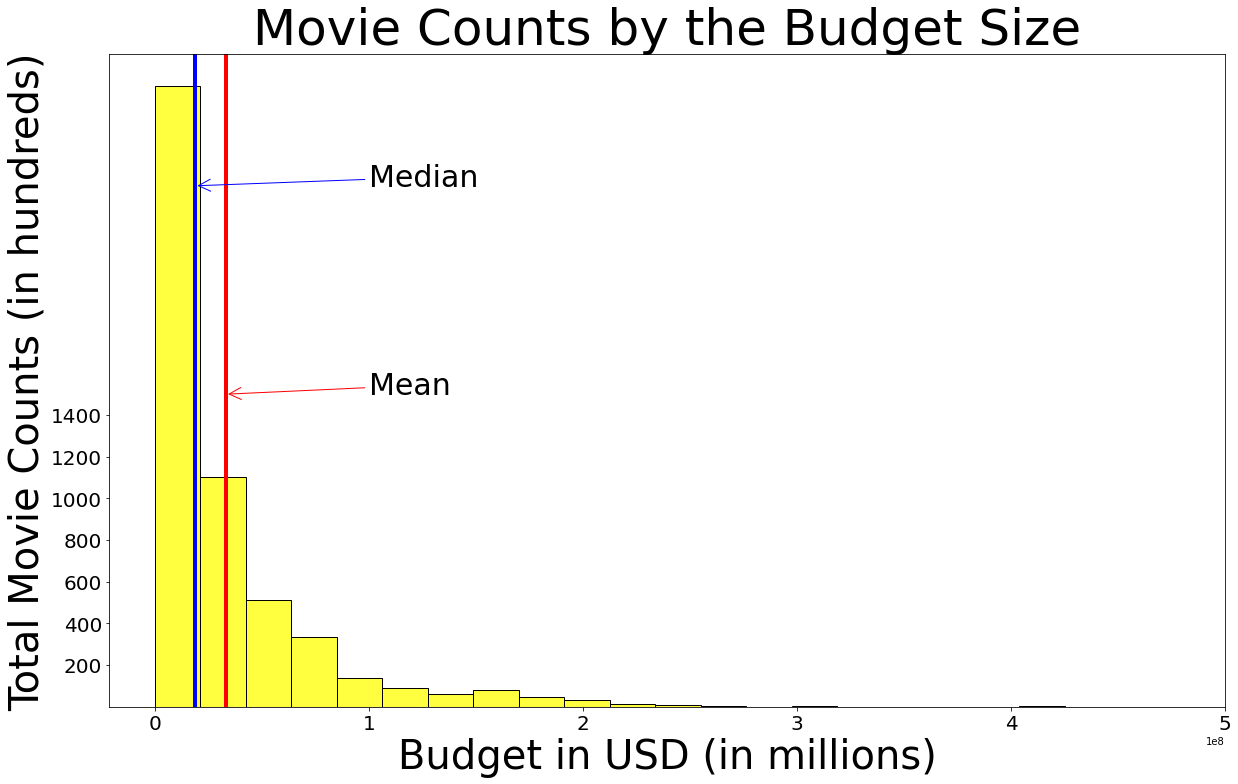

In [15]:
# Study the budget size to work only with the data application to Microsoft scenario.
# Microsoft sits on one of the largest cash reserves as a company.
# Evaluate mean and median of the budget cost.

fig, ax = plt.subplots(figsize=(20, 12))
sns.histplot(x=tn['Budget'], data=tn, bins=20, color='yellow')
plt.title("Movie Counts by the Budget Size", fontsize=50)
plt.xlabel("Budget in USD (in millions)", fontsize=40)
plt.ylabel("Total Movie Counts (in hundreds)", fontsize=40)
plt.axvline(tn['Budget'].mean(), color='r', linestyle='-', linewidth=4)
plt.axvline(tn['Budget'].median(), color='b', linestyle='-', linewidth=4)
plt.annotate('Mean', xy=(tn['Budget'].mean(), 1500), xytext=(100000000, 1500),
             fontsize=30, arrowprops={'arrowstyle': '->', 'color': 'red'})
plt.annotate('Median', xy=(tn['Budget'].median(), 2500), xytext=(100000000, 2500),
             fontsize=30, arrowprops={'arrowstyle': '->', 'color': 'b'})
plt.xticks(range(0,600000000,100000000),fontsize=20)
plt.yticks(range(200,1600,200), fontsize=20)
plt.show()

In [16]:
# Compute descriptive statistics on the budget.

print('Mean Budget:             ' + str(round(tn['Budget'].mean(), 3)))
print('Maximum Budget:          ' + str(round(tn['Budget'].max(), 3)))
print('Minimum Budget:          ' + str(round(tn['Budget'].min(), 3)))
print('25th Percentile Budget:  ' + str(round(tn['Budget'].quantile(0.25), 3)))
print('Median Budget:           ' + str(round(tn['Budget'].median(), 3)))
print('75th Percentile Budget:  ' + str(round(tn['Budget'].quantile(0.75), 3)))


Mean Budget:             33308006.085
Maximum Budget:          425000000
Minimum Budget:          1100
25th Percentile Budget:  6000000.0
Median Budget:           19000000.0
75th Percentile Budget:  42000000.0


In [17]:
# Find profit of each movie.
tn['Profit'] = tn['Revenue']-tn['Budget']

# ROI (Return on Investment) is a very important indicator of financial success.
tn['ROI'] = tn['Profit']/tn['Budget']

# Create a new column called 'Budget Level' that has four categoris:
#   'super low', 'low', 'medium' and 'high' by cutting them on each quantile range.
tn['Budget Level'] = pd.cut(tn['Budget'], 
                       bins=[tn['Budget'].min(),tn['Budget'].quantile(0.25),tn['Budget'].quantile(0.5),tn['Budget'].quantile(0.75),tn['Budget'].max()], 
                       labels=['super low','low','medium','high'])

# Define a new column called 'Profitability' that returns 'profit' if ROI is positive,
# 'loss' is ROI is negative.
tn['Profitability'] = tn['ROI'].apply(lambda x: 'profit' if x > 0 else 'loss')

In [18]:
# Sort the ROI values in descending order.
# See the top 54 values (top 1%).

tn = tn.sort_values(by='ROI', ascending = False)
tn.head(54)

,Movie,Budget,Revenue,Year,Profit,ROI,Budget Level,Profitability
5745,Deep Throat,25000,45000000,1972,44975000,1799.000000,super low,profit
5613,Mad Max,200000,99750000,1980,99550000,497.750000,super low,profit
5492,Paranormal Activity,450000,194183034,2009,193733034,430.517853,super low,profit
5679,The Gallows,100000,41656474,2015,41556474,415.564740,super low,profit
5406,The Blair Witch Project,600000,248300000,1999,247700000,412.833333,super low,profit
5709,Super Size Me,65000,22233808,2004,22168808,341.058585,super low,profit
5346,Bambi,858000,268000000,1942,267142000,311.354312,super low,profit
5773,El Mariachi,7000,2041928,1993,2034928,290.704000,super low,profit
5676,Night of the Living Dead,114000,30087064,1968,29973064,262.921614,super low,profit
5210,Rocky,1000000,225000000,1976,224000000,224.000000,super low,profit


In [19]:
# As expected, most of them have extremely low budget, which will be not relevant for
# Microsoft. Also, most of them are very old and thus will be dropped from tn.

tn = tn[tn.ROI <= 56.508517]

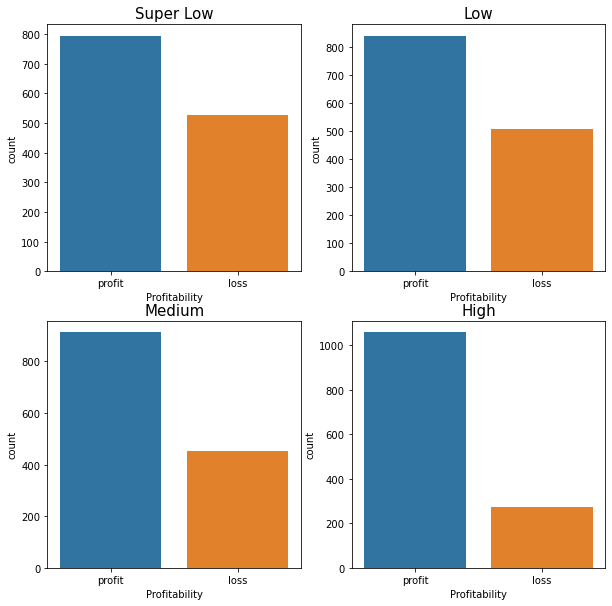

In [20]:
# Draw a countplot for each budget category to show how much more a movie is likely to
# yield profit given the budget category

fig, ax = plt.subplots(2, 2, figsize=(10, 10))


sns.countplot(x=tn[tn['Budget Level'] == 'super low']['Profitability'], ax = ax[0,0])
ax[0,0].set_title("Super Low", fontsize=15)

sns.countplot(x=tn[tn['Budget Level'] == 'low']['Profitability'], ax=ax[0,1])
ax[0,1].set_title("Low", fontsize=15)

sns.countplot(x=tn[tn['Budget Level'] == 'medium']['Profitability'], ax=ax[1,0])
ax[1,0].set_title("Medium", fontsize=15)

sns.countplot(x=tn[tn['Budget Level'] == 'high']['Profitability'], ax=ax[1,1])
ax[1,1].set_title("High", fontsize=15)

plt.show()

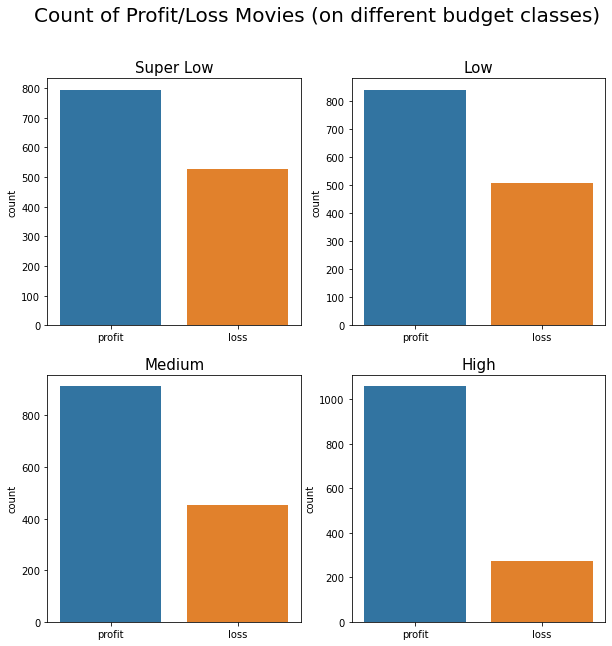

In [22]:
# This graph shows that at high budget level, movies yield the best financial results.
# Name the super-title and get rid of unnecessary information for easier visualization.
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Count of Profit/Loss Movies (on different budget classes)',
             fontsize=20)

sns.countplot(x=tn[tn['Budget Level'] == 'super low']['Profitability'], ax = ax[0,0])
ax[0,0].set_title("Super Low", fontsize=15)
ax[0,0].set_xlabel("")

sns.countplot(x=tn[tn['Budget Level'] == 'low']['Profitability'], ax=ax[0,1])
ax[0,1].set_title("Low", fontsize=15)
ax[0,1].set_xlabel("")

sns.countplot(x=tn[tn['Budget Level'] == 'medium']['Profitability'], ax=ax[1,0])
ax[1,0].set_title("Medium", fontsize=15)
ax[1,0].set_xlabel("")

sns.countplot(x=tn[tn['Budget Level'] == 'high']['Profitability'], ax=ax[1,1])
ax[1,1].set_title("High", fontsize=15)
ax[1,1].set_xlabel("")

plt.show()
fig.savefig('bar_profitloss.png')

NameError: name 'line' is not defined

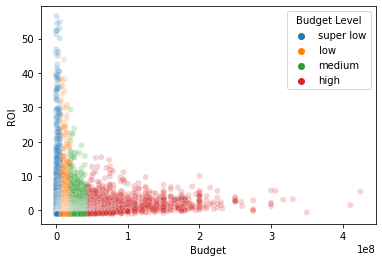

In [23]:
# Draw the scatterplot with different budget categories visualized differently.

sns.scatterplot(x='Budget', y='ROI', data=tn, hue='Budget Level', alpha=0.2)
line
plt.show()

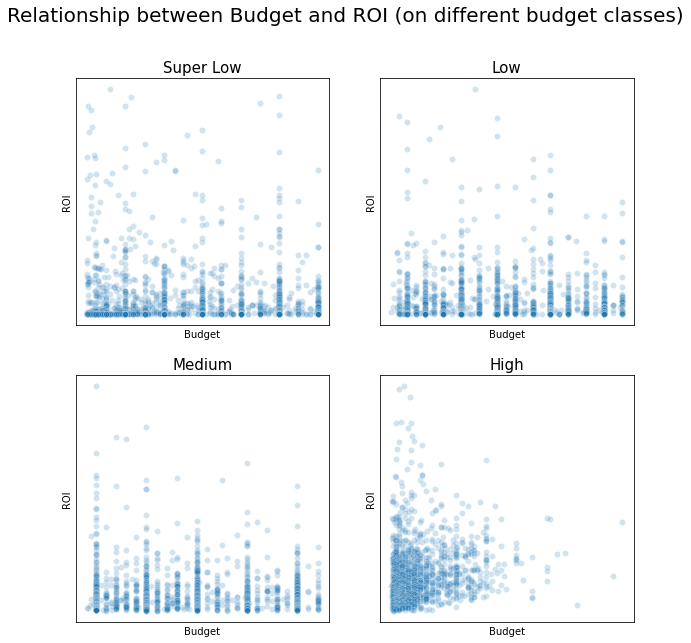

In [25]:
# Not much discovery can be drawn from the above graph.
# Draw a scatter plot for each budget category separately.
# We are interested in pattern of the distribution only.


fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Relationship between Budget and ROI (on different budget classes)',
             fontsize=20)
sns.scatterplot(x="Budget", y="ROI", alpha=0.2,
                data=tn[tn['Budget Level'] == 'super low'], ax=ax[0,0])
ax[0,0].set_title("Super Low", fontsize=15)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

sns.scatterplot(x="Budget", y="ROI", alpha=0.2,
                data=tn[tn['Budget Level'] == 'low'], ax=ax[0,1])
ax[0,1].set_title("Low", fontsize=15)
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])

sns.scatterplot(x="Budget", y="ROI", alpha=0.2,
                data=tn[tn['Budget Level'] == 'medium'], ax=ax[1,0])
ax[1,0].set_title("Medium", fontsize=15)
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

sns.scatterplot(x="Budget", y="ROI", alpha=0.2,
                data=tn[tn['Budget Level'] == 'high'], ax=ax[1,1])
ax[1,1].set_title("High", fontsize=15)
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])

plt.show()
fig.savefig('scatter_budgetROI.png')

In [26]:
# High Budget movies have visually distinct distribution shape.
# Let's compute Pearson's correlation coefficient for each budget category.

r_slowbud = tn[tn['Budget Level'] == 'super low']['Budget'].corr(tn[tn['Budget Level'] == 'super low']['ROI'])
r_lowbud = tn[tn['Budget Level'] == 'low']['Budget'].corr(tn[tn['Budget Level'] == 'low']['ROI'])
r_medbud = tn[tn['Budget Level'] == 'medium']['Budget'].corr(tn[tn['Budget Level'] == 'medium']['ROI'])
r_highbud = tn[tn['Budget Level'] == 'high']['Budget'].corr(tn[tn['Budget Level'] == 'high']['ROI'])

print('Super-Low-Budget and ROI\'s correlation:  ' + str(round(r_slowbud, 3)))
print('Low-Budget and ROI\'s correlation:        ' + str(round(r_lowbud, 3)))
print('Medium-Budget and ROI\'s correlation:     ' + str(round(r_medbud, 3)))
print('High-Budget and ROI\'s correlation:       ' + str(round(r_highbud, 3)))

Super-Low-Budget and ROI's correlation:  -0.065
Low-Budget and ROI's correlation:        -0.034
Medium-Budget and ROI's correlation:     -0.049
High-Budget and ROI's correlation:       0.143


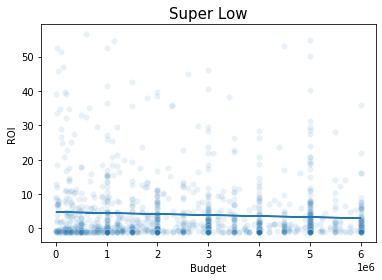

In [27]:
# Draw a linear regression on the already established scatterplot on Super Low.

fig, ax = plt.subplots()
x = tn[tn['Budget Level'] == 'super low']['Budget']
y = tn[tn['Budget Level'] == 'super low']['ROI']
slope,intercept,r_value,p_value,std_err = linregress(x, y)
line = [slope*xi + intercept for xi in x]
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.plot(x, line)
plt.title("Super Low", fontsize=15)
plt.show()
fig.savefig('slow_scatter_profitloss.png')

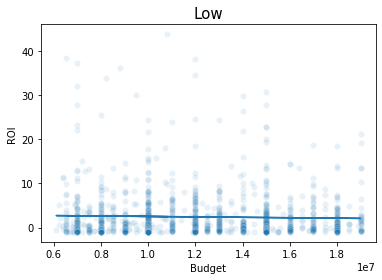

In [28]:
# Draw a linear regression on the already established scatterplot on Low.

fig, ax = plt.subplots()
x = tn[tn['Budget Level'] == 'low']['Budget']
y = tn[tn['Budget Level'] == 'low']['ROI']
slope,intercept,r_value,p_value,std_err = linregress(x, y)
line = [slope*xi + intercept for xi in x]
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.plot(x, line)
plt.title("Low", fontsize=15)
plt.show()
fig.savefig('low_scatter_profitloss.png')

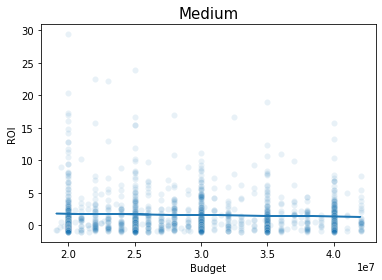

In [29]:
# Draw a linear regression on the already established scatterplot on Medium.

fig, ax = plt.subplots()
x = tn[tn['Budget Level'] == 'medium']['Budget']
y = tn[tn['Budget Level'] == 'medium']['ROI']
slope,intercept,r_value,p_value,std_err = linregress(x, y)
line = [slope*xi + intercept for xi in x]
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.plot(x, line)
plt.title("Medium", fontsize=15)
plt.show()
fig.savefig('medium_scatter_profitloss.png')

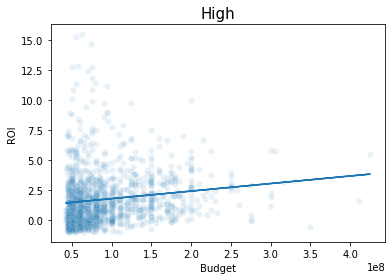

In [30]:
# Draw a linear regression on the already established scatterplot on High.

fig, ax = plt.subplots()
x = tn[tn['Budget Level'] == 'high']['Budget']
y = tn[tn['Budget Level'] == 'high']['ROI']
slope,intercept,r_value,p_value,std_err = linregress(x, y)
line = [slope*xi + intercept for xi in x]
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.plot(x, line)
plt.title("High", fontsize=15)
plt.show()
fig.savefig('high_scatter_profitloss.png')

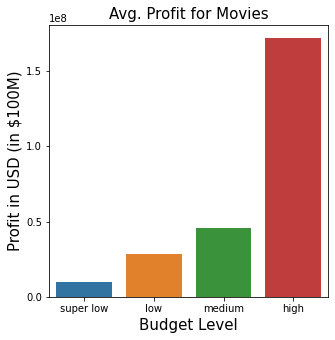

In [31]:
# Compare each of budget category's average profit.

average_profit = tn.groupby('Budget Level')['Profit'].mean()


fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=average_profit.index, y=average_profit.values)
ax.set_title("Avg. Profit for Movies",
             fontsize=15)
ax.set_xlabel("Budget Level", fontsize=15)
ax.set_ylabel("Profit in USD (in $100M)", fontsize=15)
ax.set_yticks(range(0,200000000,50000000))
plt.show()
fig.savefig('bar_budget_profit.png')

In [32]:
# Find average profit for each budget category.


prft_slowbud = tn[tn['Budget Level'] == 'super low']['Profit'].mean()
prft_lowbud = tn[tn['Budget Level'] == 'low']['Profit'].mean()
prft_medbud = tn[tn['Budget Level'] == 'medium']['Profit'].mean()
prft_highbud = tn[tn['Budget Level'] == 'high']['Profit'].mean()

print(f"""
The average profit for different budget categories:
Super-Low-Budget: {round(prft_slowbud, 3)}
Low-Budget:       {round(prft_lowbud, 3)}
Medium-Budget:    {round(prft_medbud, 3)}
High-Budget:      {round(prft_highbud, 3)}
""")





The average profit for different budget categories:
Super-Low-Budget: 9606094.714
Low-Budget:       28661489.014
Medium-Budget:    45887552.541
High-Budget:      171985776.054



In [25]:
# Clean imdb_df by dropping unnecessary columns and changing column names.

selected_columns = ['original_title', 'runtime_minutes', 'genres', 'averagerating', 
                    'numvotes', 'start_year']
imdb = imdb_df[selected_columns]
imdb = imdb.rename(columns = {'original_title':'Movie', 'runtime_minutes':'Runtime',
                       'genres':'Genre', 'averagerating':'Rating', 'numvotes':'Votes',
                       'start_year':'Year'})

# Take a deeper look into imdb by looking at its shape and data structure.

imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Movie    73856 non-null  object 
 1   Runtime  66236 non-null  float64
 2   Genre    73052 non-null  object 
 3   Rating   73856 non-null  float64
 4   Votes    73856 non-null  int64  
 5   Year     73856 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.4+ MB


In [29]:
# Change tn's 'Year' data type to int64, so it can be merged with imdb's 'Year'.

tn['Year'] = pd.to_numeric(tn['Year'], errors='coerce')

In [ ]:
# Merge tn and imdb

tnimdb = tn.merge(imdb, how = 'left', on = ['Movie', 'Year'])

In [37]:
# Drop data points that has no value for 'Runtime'.
tnimdb = tnimdb.dropna(subset=['Runtime'])

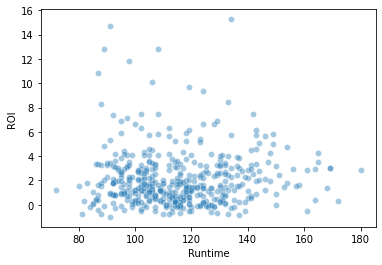

In [45]:
# Draw a scatterplot to see how Runtime and ROI are related among high budget movies.

sns.scatterplot(x='Runtime', y='ROI', data=tnimdb[tnimdb['Budget Level'] == 'high'],
                alpha=0.4)
plt.show()

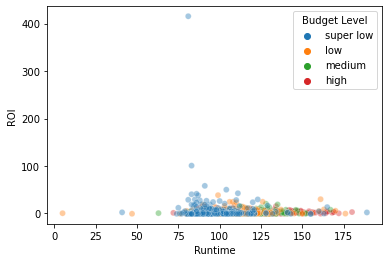

In [46]:
# Draw a scatterplot to see how Runtime and ROI are related among high budget movies.

sns.scatterplot(x='Runtime', y='ROI', data=tnimdb, hue='Budget Level', alpha=0.4)
plt.show()

In [61]:
# My First Recommendation

# Microsoft sits on one of the biggest cash reserve as a company.
# Given its reputation, its new business will always attract investors.
# Our study conveys that higher budget categories lead to higher returns.
# Microsoft should consider creating high budget films for best ROI.

In [ ]:
#

In [30]:
# Things learned from study of tn alone:
# 
# 1. Budget and ROI seems to be negatively correlated.
# 2. Highest ROI's happen with low-budget movies, and thus are not meaningful for
#    Microsoft, who wants to disrput the industry.
# 3. As previously mentioned, interested only in movies whose budgets cost $100M or more.


In [31]:
# Consider only the movies with budget of $100M or more.
# See how their distribution works when only taking into accout the condition above.
# Make a new dataframe temporary_tn with conditions listed above.

temporary_tn = tn[tn['Budget'] >= 100000000]
temporary_tn

,Movie,Budget,Revenue,Year,ROI
0,Avatar,425000000,2776345279,2009,6.532577
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011,2.546673
2,Dark Phoenix,350000000,149762350,2019,0.427892
3,Avengers: Age of Ultron,330600000,1403013963,2015,4.243841
4,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,2017,4.153696
...,...,...,...,...,...
401,Transcendence,100000000,103039258,2014,1.030393
402,Son of the Mask,100000000,59918422,2005,0.599184
403,Mortal Engines,100000000,85287417,2018,0.852874
404,The Adventures of Pluto Nash,100000000,7094995,2002,0.070950


In [78]:
tn['Budget Level'] = pd.cut(tn['Budget'], 
                       bins=[tn['Budget'].min(),tn['Budget'].quantile(0.25),tn['Budget'].quantile(0.5),tn['Budget'].quantile(0.75),tn['Budget'].max()], 
                       labels=['super_low','low','medium','high'])


In [79]:
tn

,Movie,Budget,Revenue,Year,ROI,Profit,Budget Level
0,Avatar,425000000,2776345279,2009,5.532577,2351345279,high
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011,1.546673,635063875,high
2,Dark Phoenix,350000000,149762350,2019,-0.572108,-200237650,high
3,Avengers: Age of Ultron,330600000,1403013963,2015,3.243841,1072413963,high
4,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,2017,3.153696,999721747,high
...,...,...,...,...,...,...,...
5775,Cavite,7000,71644,2006,9.234857,64644,super_low
5776,The Mongol King,7000,900,2004,-0.871429,-6100,super_low
5778,Following,6000,240495,1999,39.082500,234495,super_low
5779,Return to the Land of Wonders,5000,1338,2005,-0.732400,-3662,super_low


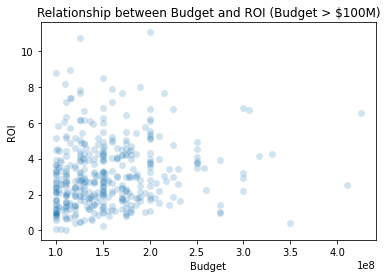

In [46]:
# Draw a scatterplot to see the relationship between Budget and ROI for movies costing $100M or more.

sns.scatterplot(x='Budget', y='ROI', data=temporary_tn, s=50, alpha=0.2)
plt.title("Relationship between Budget and ROI (Budget > $100M)")
plt.show()

In [47]:
# Clean other tables for future merging.

selected_columns = ['genre_ids','original_title','release_date','title',
                    'popularity', 'vote_average','vote_count']
tmdb = tmdb_movies_df[selected_columns]
tmdb = tmdb.rename(columns={'genre_ids':'Genre ID', 'original_title':'Original Title',
                            'release_date':'Date', 'title':'Movie', 
                            'vote_average':'Rating', 'popularity':'Popularity',
                            'vote_count':'Reviews'})


In [61]:
tmdb

,Genre ID,Original Title,Date,Movie,Popularity,Rating,Reviews
0,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788
1,"[14, 12, 16, 10751]",How to Train Your Dragon,2010-03-26,How to Train Your Dragon,28.734,7.7,7610
2,"[12, 28, 878]",Iron Man 2,2010-05-07,Iron Man 2,28.515,6.8,12368
3,"[16, 35, 10751]",Toy Story,1995-11-22,Toy Story,28.005,7.9,10174
4,"[28, 878, 12]",Inception,2010-07-16,Inception,27.920,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",Laboratory Conditions,2018-10-13,Laboratory Conditions,0.600,0.0,1
26513,"[18, 53]",_EXHIBIT_84xxx_,2018-05-01,_EXHIBIT_84xxx_,0.600,0.0,1
26514,"[14, 28, 12]",The Last One,2018-10-01,The Last One,0.600,0.0,1
26515,"[10751, 12, 28]",Trailer Made,2018-06-22,Trailer Made,0.600,0.0,1


In [49]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Genre ID        26517 non-null  object 
 1   Original Title  26517 non-null  object 
 2   Date            26517 non-null  object 
 3   Movie           26517 non-null  object 
 4   Popularity      26517 non-null  float64
 5   Rating          26517 non-null  float64
 6   Reviews         26517 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [48]:
# Change Date's data type into datetime.

tmdb['Date'] = pd.to_datetime(tmdb['Date'])

In [49]:
# Just get the years from 'Date' column and assign them to a new column 'Year'.
# Then, drop the 'Date' column and 'Original Title'
tmdb['Year'] = tmdb['Date'].dt.strftime('%Y')
tmdb = tmdb.drop(['Date'], axis=1)
tmdb = tmdb.drop(['Original Title'], axis=1)

In [50]:
# Want to see if elements in the list under the column 'Genre ID' are int.
genre_id_str = []
genre_id_int = []
genre_id_other =[]

for element in tmdb['Genre ID']:
    for entry in element:
        if type(entry) == str:
            genre_id_str.append(entry)
        elif type(entry) == int:
            genre_id_int.append(entry)
        else:
            genre_id_other.append(entry)

print(len(genre_id_str))
print(len(genre_id_int))
print(len(genre_id_other))

210315
0
0


In [72]:
# We see that they are not. They are all list-looking strings.
# We will actually make them a list of lists, and zip them to the dataframe.
# We will use the module ast.

import ast

list_string_genre_id = list(tmdb['Genre ID'])
list_list_genre_id = [ast.literal_eval(string) for string in list_string_genre_id]

In [73]:
# Create a dictionary to help make a conversion from genre id number to genre name.

genre_id = {28:'Action', 12:'Adventure', 16:'Animation', 35:'Comedy', 80:'Crime',
            99:'Documentary', 18:'Drama', 10751:'Family', 14:'Fantasy', 36:'History',
            27:'Horror', 10402:'Music', 9648:'Mystery', 10749:'Romance',
            878:'Science Fiction', 10770:'TV Movie', 53:'Thriller', 10752:'War',
            37:'Western'}

In [74]:
# Create a list of genres that have verbal names instead of genre id numbers.

movie_genre = []
movie_genre_english = []
for small_list in list_list_genre_id:
    movie_genre = [genre_id[entry] for entry in small_list]
    movie_genre_english.append(movie_genre)
    movie_genre = []
        
        

In [128]:
# Brendan3
# tn['year'] = pd.to_datetime(tn['Date']).dt.year

<ipython-input-128-05afdbb9ff10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['year'] = pd.to_datetime(tn['Date']).dt.year


In [124]:
# Brendan2
# tmdb['year'] = pd.to_datetime(tmdb['Date']).dt.year

In [131]:
# Brendan4
# tmdb2= tmdb.merge(tn, how = 'left', on = ['Movie', 'year'])

In [78]:
# Create a new dataframe that has Genre in words.

tmdb = pd.DataFrame(list(zip(tmdb['Movie'], tmdb['Year'],
                             tmdb['Popularity'], tmdb['Rating'], tmdb['Reviews'],
                             movie_genre_english)), columns = ['Movie', 'Year', 
                                                               'Popularity', 'Rating', 
                                                               'Reviews', 'Genre'])

tmdb

,Movie,Year,Popularity,Rating,Reviews,Genre
0,Harry Potter and the Deathly Hallows: Part 1,2010,33.533,7.7,10788,"[Adventure, Fantasy, Family]"
1,How to Train Your Dragon,2010,28.734,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,Iron Man 2,2010,28.515,6.8,12368,"[Adventure, Action, Science Fiction]"
3,Toy Story,1995,28.005,7.9,10174,"[Animation, Comedy, Family]"
4,Inception,2010,27.920,8.3,22186,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...,...
26512,Laboratory Conditions,2018,0.600,0.0,1,"[Horror, Drama]"
26513,_EXHIBIT_84xxx_,2018,0.600,0.0,1,"[Drama, Thriller]"
26514,The Last One,2018,0.600,0.0,1,"[Fantasy, Action, Adventure]"
26515,Trailer Made,2018,0.600,0.0,1,"[Family, Adventure, Action]"


In [ ]:
# Reference

# For all movies, breakdown by genre
cd_copy = cleaned_data[cleaned_data["genres"].notnull()].copy()
cd_copy2 = cd_copy.copy()
cd_copy["genres"] = cd_copy["genres"].str.split(",")
vcs = cd_copy.explode("genres")["genres"].value_counts()
infrequent_genres = vcs[vcs < 50].index
cd_freq_genres_only = cd_copy2[cd_copy2["genres"].str.contains('|'.join(infrequent_genres))== False]

In [106]:
# Brendan1
# Merge tn and tmdb to yield a table.

# tn_tmdb = pd.merge(tn, tmdb, on="Movie", how='inner')

In [164]:
# Brendan7
# tmdb2['Genre ID'][0]

'[12, 14, 10751]'

In [140]:
# Brendan5
# [genre_id[i] for i in (tmdb2['Genre ID'][0])]

KeyError: '['

In [157]:
# Brendan6
# Briefly look at tn_tmdb

# tmdb2['Genre ID'].apply(lambda x: [genre_id[i] for i in x])

KeyError: '['

In [89]:
# Explore bom_gross_df

bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [90]:
bom_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [41]:
# Also clean bom_gross_df

bom = bom_gross_df

In [42]:
# Explore more into bom

bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [43]:
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

In [44]:
# Create a new column 'Revenue' to incorporate domestic_gross and foriegn_gross.

bom['Revenue'] = bom['domestic_gross']+bom['foreign_gross']
bom = bom.rename(columns = {'title':'Movie', 'studio':'Studio', 'year':'Date'})

In [45]:
# Condense the dataframes with only the columns needed.

selected_columns = ['Movie', 'Studio', 'Date', 'Revenue']
bom = bom[selected_columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id         73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [40]:
# Clean imdb_df

imdb_df
selected_columns = ['original_title','start_year', 'runtime_minutes', 'genres']
clean_imdb = imdb_df[selected_columns]
clean_imdb = clean_imdb.rename(columns={'original_title':'Movie', 'start_year':'Year',
                           'runtime_minutes':'Runtime', 'genres':'Genre'})
clean_imdb = clean_imdb.dropna()
clean_imdb

,Movie,Year,Runtime,Genre
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
4,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
6,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
...,...,...,...,...
73849,Padmavyuhathile Abhimanyu,2019,130.0,Drama
73850,Swarm Season,2019,86.0,Documentary
73851,Diabolik sono io,2019,75.0,Documentary
73852,Sokagin Çocuklari,2019,98.0,"Drama,Family"


In [53]:
clean = imdb_df.copy()
genre = clean['genres']

pandas.core.series.Series

In [45]:
# Categorize movies based on their genres.
import ast

clean_imdb = clean_imdb[clean_imdb['Genre'].notnull()].copy()
clean_imdb2 = clean_imdb.copy()
clean_imdb['Genre'] = clean_imdb['Genre'].str.split(",")
genre_value_counts = clean_imdb.explode('Genre')['Genre'].value_counts()


AttributeError: Can only use .str accessor with string values!

In [ ]:
# For all movies, breakdown by genre
cd_copy = cleaned_data[cleaned_data["genres"].notnull()].copy()
cd_copy2 = cd_copy.copy()
cd_copy["genres"] = cd_copy["genres"].str.split(",")
vcs = cd_copy.explode("genres")["genres"].value_counts()
infrequent_genres = vcs[vcs < 50].index
cd_freq_genres_only = cd_copy2[cd_copy2["genres"].str.contains('|'.join(infrequent_genres))== False]